<a href="https://colab.research.google.com/github/poggable/pytorch-learning/blob/main/the_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print("MNIST dataset loaded and preprocessed successfully!")
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MNIST dataset loaded and preprocessed successfully!
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Next, we'll define the neural network model with two hidden layers of 16 neurons each, using the sigmoid activation function, and an output layer with 10 neurons for the digits.

In [ ]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 784-element vector
    Dense(16, activation='sigmoid'),  # First hidden layer with 16 neurons and sigmoid activation
    Dense(16, activation='sigmoid'),  # Second hidden layer with 16 neurons and sigmoid activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 digits) and softmax activation
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Finally, we'll compile the model, specifying the optimizer and the loss function.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")

Model compiled successfully!


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5900 - loss: 1.6250 - val_accuracy: 0.8898 - val_loss: 0.5257
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8934 - loss: 0.4590 - val_accuracy: 0.9150 - val_loss: 0.3266
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9189 - loss: 0.3042 - val_accuracy: 0.9278 - val_loss: 0.2679
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9302 - loss: 0.2560 - val_accuracy: 0.9337 - val_loss: 0.2395
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.2289 - val_accuracy: 0.9375 - val_loss: 0.2241
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9411 - loss: 0.2101 - val_accuracy: 0.9396 - val_loss: 0.2137
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9455 - loss: 0.1939 - val_accuracy: 0.9398 - val_loss: 0.2087
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9486 - loss: 0.1809 

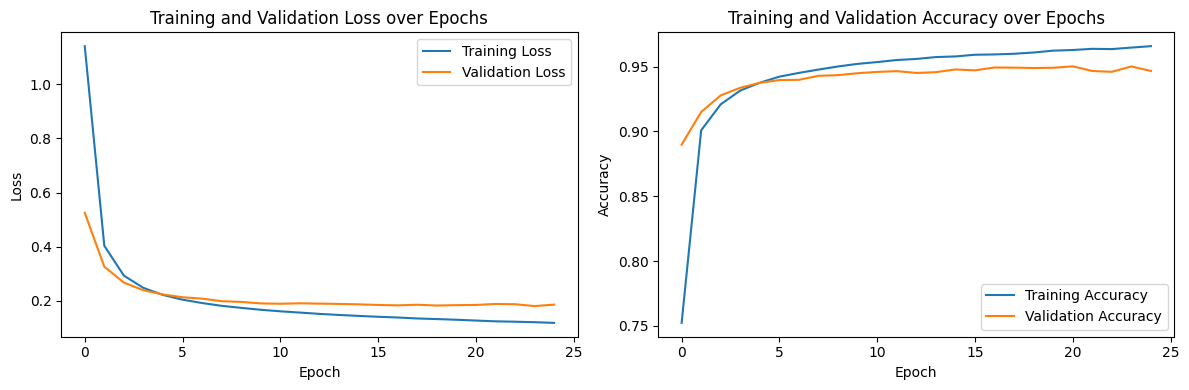

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

print("Model trained successfully!")

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

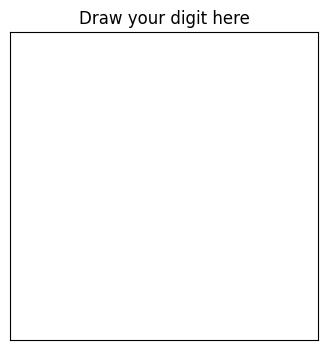

Draw your digit on the canvas above. After drawing, we'll process it and get a prediction.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes for the drawing canvas
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim([0, 28])
ax.set_ylim([0, 28])
ax.set_aspect('equal', adjustable='box')
ax.invert_yaxis() # Invert y-axis to match image coordinates

# Disable axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Title for the canvas
ax.set_title("Draw your digit here")

# Store mouse events
coords = []

def onclick(event):
    if event.button == 1:  # Left mouse button
        coords.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'k.', markersize=10) # Draw a point
        fig.canvas.draw()

def onrelease(event):
    if event.button == 1: # Left mouse button
        # Optional: Add logic here if needed when the mouse button is released
        pass

# Connect mouse events
cid_press = fig.canvas.mpl_connect('button_press_event', onclick)
cid_release = fig.canvas.mpl_connect('button_release_event', onrelease)

plt.show()

print("Draw your digit on the canvas above. After drawing, we'll process it and get a prediction.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import tkinter as tk
from tkinter import Canvas

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print("MNIST dataset loaded and preprocessed successfully!")
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 784-element vector
    Dense(16, activation='sigmoid'),  # First hidden layer with 16 neurons and sigmoid activation
    Dense(16, activation='sigmoid'),  # Second hidden layer with 16 neurons and sigmoid activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")

# Train the model
print("Training the model...")
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
print("Model trained successfully!")

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

MNIST dataset loaded and preprocessed successfully!
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)
Model compiled successfully!
Training the model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5744 - loss: 1.6285 - val_accuracy: 0.8790 - val_loss: 0.5382
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8851 - loss: 0.4691 - val_accuracy: 0.9098 - val_loss: 0.3343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9145 - loss: 0.3112 - val_accuracy: 0.9258 - val_loss: 0.2697
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9312 - loss: 0.2490 - val_accuracy: 0.9314 - val_loss: 0.2419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9385 - loss: 0.2210 - val_accuracy: 0.9387 - val_loss: 0.2163
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9435 - loss: 0.2007 - val_accuracy: 0.9419 - val_loss: 0.2028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9464 - loss: 0.1835 - val_accuracy: 0.9434 - val_loss: 0.1936
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9528 - loss: 0.1680

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import tkinter as tk
from tkinter import Canvas
import io # Import io for handling image data

class DrawingApp:
    def __init__(self, master, model):
        self.master = master
        master.title("Draw a Digit")

        self.model = model

        self.canvas_size = 280 # Make the canvas larger for easier drawing
        self.scale_factor = self.canvas_size // 28 # Calculate scale factor

        self.canvas = Canvas(master, bg='black', width=self.canvas_size, height=self.canvas_size)
        self.canvas.pack(pady=10)

        self.old_x = None
        self.old_y = None
        self.canvas.bind('<B1-Motion>', self.paint)
        self.canvas.bind('<ButtonRelease-1>', self.reset)

        self.button_frame = tk.Frame(master)
        self.button_frame.pack(pady=5)

        self.predict_button = tk.Button(self.button_frame, text="Predict", command=self.predict_digit)
        self.predict_button.pack(side=tk.LEFT, padx=5)

        self.clear_button = tk.Button(self.button_frame, text="Clear", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT, padx=5)

        self.label = tk.Label(master, text="Draw a digit (0-9)")
        self.label.pack(pady=5)

        # Add options frame
        self.options_frame = tk.Frame(master)
        self.options_frame.pack(pady=5)

        self.draw_again_button = tk.Button(self.options_frame, text="Draw Again", command=self.clear_canvas)
        self.draw_again_button.pack(side=tk.LEFT, padx=5)
        self.draw_again_button.config(state=tk.DISABLED) # Disable initially

        self.exit_button = tk.Button(self.options_frame, text="Exit", command=master.quit)
        self.exit_button.pack(side=tk.LEFT, padx=5)
        self.exit_button.config(state=tk.DISABLED) # Disable initially


    def paint(self, event):
        paint_color = 'white'
        line_width = 15 # Adjust line width for better drawing

        if self.old_x and self.old_y:
            self.canvas.create_line(self.old_x, self.old_y, event.x, event.y,
                               fill=paint_color, width=line_width, capstyle=tk.ROUND, smooth=tk.TRUE)
        self.old_x = event.x
        self.old_y = event.y

    def reset(self, event):
        self.old_x, self.old_y = None, None

    def clear_canvas(self):
        self.canvas.delete("all")
        self.label.config(text="Draw a digit (0-9)")
        self.predict_button.config(state=tk.NORMAL) # Enable predict button
        self.draw_again_button.config(state=tk.DISABLED) # Disable draw again button
        self.exit_button.config(state=tk.DISABLED) # Disable exit button


    def predict_digit(self):
        # Create a PIL image from the canvas
        # Get the canvas content as a postscript string
        ps = self.canvas.postscript(colormode='color')
        # Use Pillow to open the postscript string
        img = Image.open(io.BytesIO(ps.encode('utf-8')))

        # Convert to grayscale and resize
        img = img.convert('L')
        img = img.resize((28, 28), Image.Resampling.LANCZOS)
        img = ImageOps.invert(img) # Invert colors to match MNIST (white digit on black background)

        # Normalize pixel values
        img_array = np.array(img)
        img_array = img_array / 255.0
        img_array = img_array.reshape(1, 28, 28) # Reshape for the model

        # Make prediction
        prediction = self.model.predict(img_array)
        predicted_digit = np.argmax(prediction)

        # Display prediction
        self.label.config(text=f"Prediction: {predicted_digit}")

        # Enable draw again and exit buttons after prediction
        self.predict_button.config(state=tk.DISABLED) # Disable predict button
        self.draw_again_button.config(state=tk.NORMAL)
        self.exit_button.config(state=tk.NORMAL)


if __name__ == "__main__":
    # Assuming the model has been trained in the previous code block
    # If running this code separately, you would need to load a pre-trained model here.

    root = tk.Tk()
    app = DrawingApp(root, model) # Pass the trained model to the app
    root.mainloop()

TclError: no display name and no $DISPLAY environment variable

Since direct drawing is not supported in Colab, we'll implement an alternative way to test the model. You can input a digit (0-9), and we'll display a random image of that digit from the test dataset and the model's prediction for that image.

Enter a digit (0-9) to test the model: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


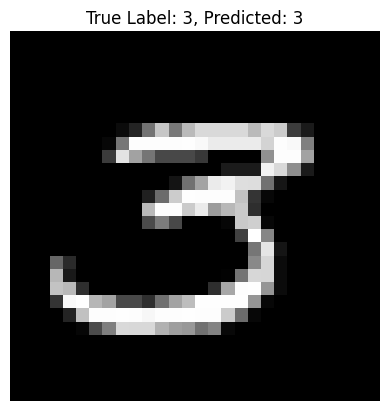

In [ ]:
# Get user input for the digit
try:
    digit_to_predict = int(input("Enter a digit (0-9) to test the model: "))
    if digit_to_predict < 0 or digit_to_predict > 9:
        print("Invalid input. Please enter a digit between 0 and 9.")
        digit_to_predict = None
except ValueError:
    print("Invalid input. Please enter a valid integer.")
    digit_to_predict = None

if digit_to_predict is not None:
    # Find all indices in the test set that correspond to the entered digit
    indices = np.where(y_test == digit_to_predict)[0]

    if len(indices) > 0:
        # Select a random index from the found indices
        random_index = np.random.choice(indices)

        # Get the image and its true label
        image_to_predict = x_test[random_index]
        true_label = y_test[random_index]

        # Reshape the image for prediction (add batch dimension)
        img_for_prediction = image_to_predict.reshape(1, 28, 28)

        # Make prediction
        prediction = model.predict(img_for_prediction)
        predicted_digit = np.argmax(prediction)

        # Display the image and prediction
        plt.imshow(image_to_predict, cmap='gray')
        plt.title(f"True Label: {true_label}, Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()

    else:
        print(f"No images of digit {digit_to_predict} found in the test set.")